# Phishing Detection - Cyber Heals

Objective: to create a machine learning model to be able to predict if a url is phishing or not.  

Steps in order to achieve this:  
1. Creating a Model A to predict  
    1. Collecting Data   
    2. extracting features*  
    3. Training a suitable model  


2. Using Model A to predict  
    1. Taking input url
    2. Extracting features 
    3. Use trained model to predict

## Collecting Data

In [1]:

# Retrieving data from website
import pandas as pd
url = "https://huggingface.co/datasets/pirocheto/phishing-url/resolve/main/data/train.parquet"
hugf = pd.read_parquet(url)
hugf.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,legitimate


## Preparing data for Machine Learning

In [2]:
# Replacing Status column with label indicating 0 and 1
hugf["label"] = [1 if x == "phishing" else 0 for x in hugf["status"]]
hugf = hugf.drop(columns = ["status"]) 
hugf.head()



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,label
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,0
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,1
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,1
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,0
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,0


In [3]:
hugf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         7658 non-null   object 
 1   length_url                  7658 non-null   int64  
 2   length_hostname             7658 non-null   int64  
 3   ip                          7658 non-null   int64  
 4   nb_dots                     7658 non-null   int64  
 5   nb_hyphens                  7658 non-null   int64  
 6   nb_at                       7658 non-null   int64  
 7   nb_qm                       7658 non-null   int64  
 8   nb_and                      7658 non-null   int64  
 9   nb_or                       7658 non-null   int64  
 10  nb_eq                       7658 non-null   int64  
 11  nb_underscore               7658 non-null   int64  
 12  nb_tilde                    7658 non-null   int64  
 13  nb_percent                  7658 

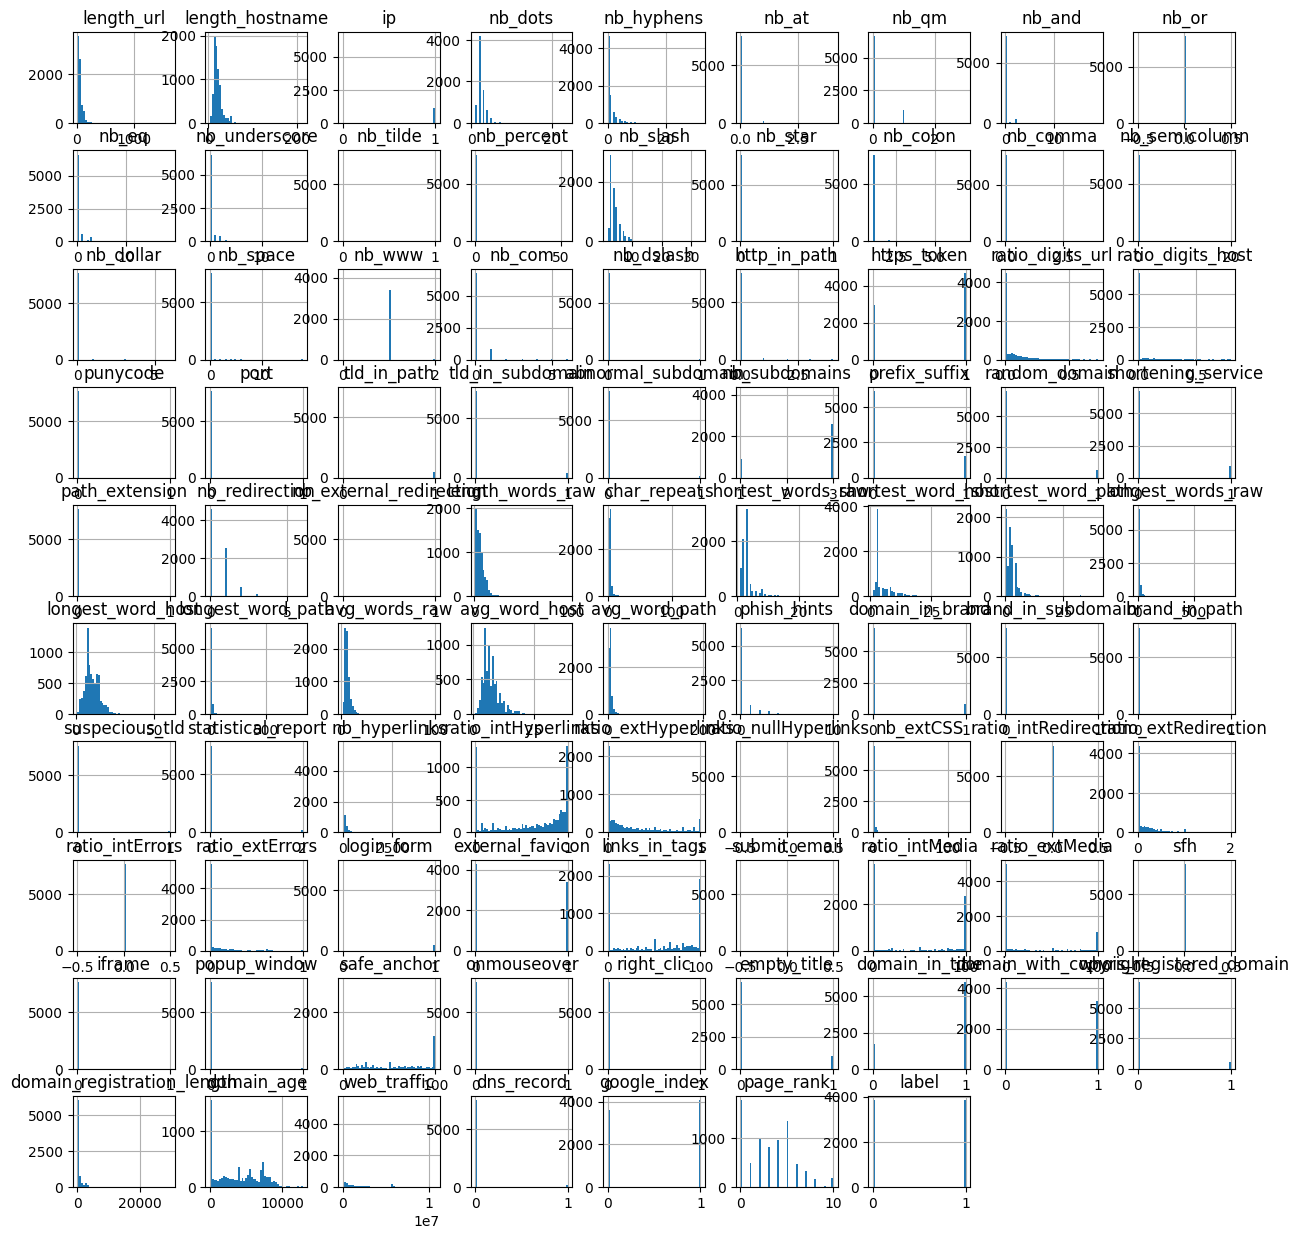

In [4]:
import matplotlib.pyplot as plt
hugf.hist(bins = 50,figsize = (15,15))
plt.show()

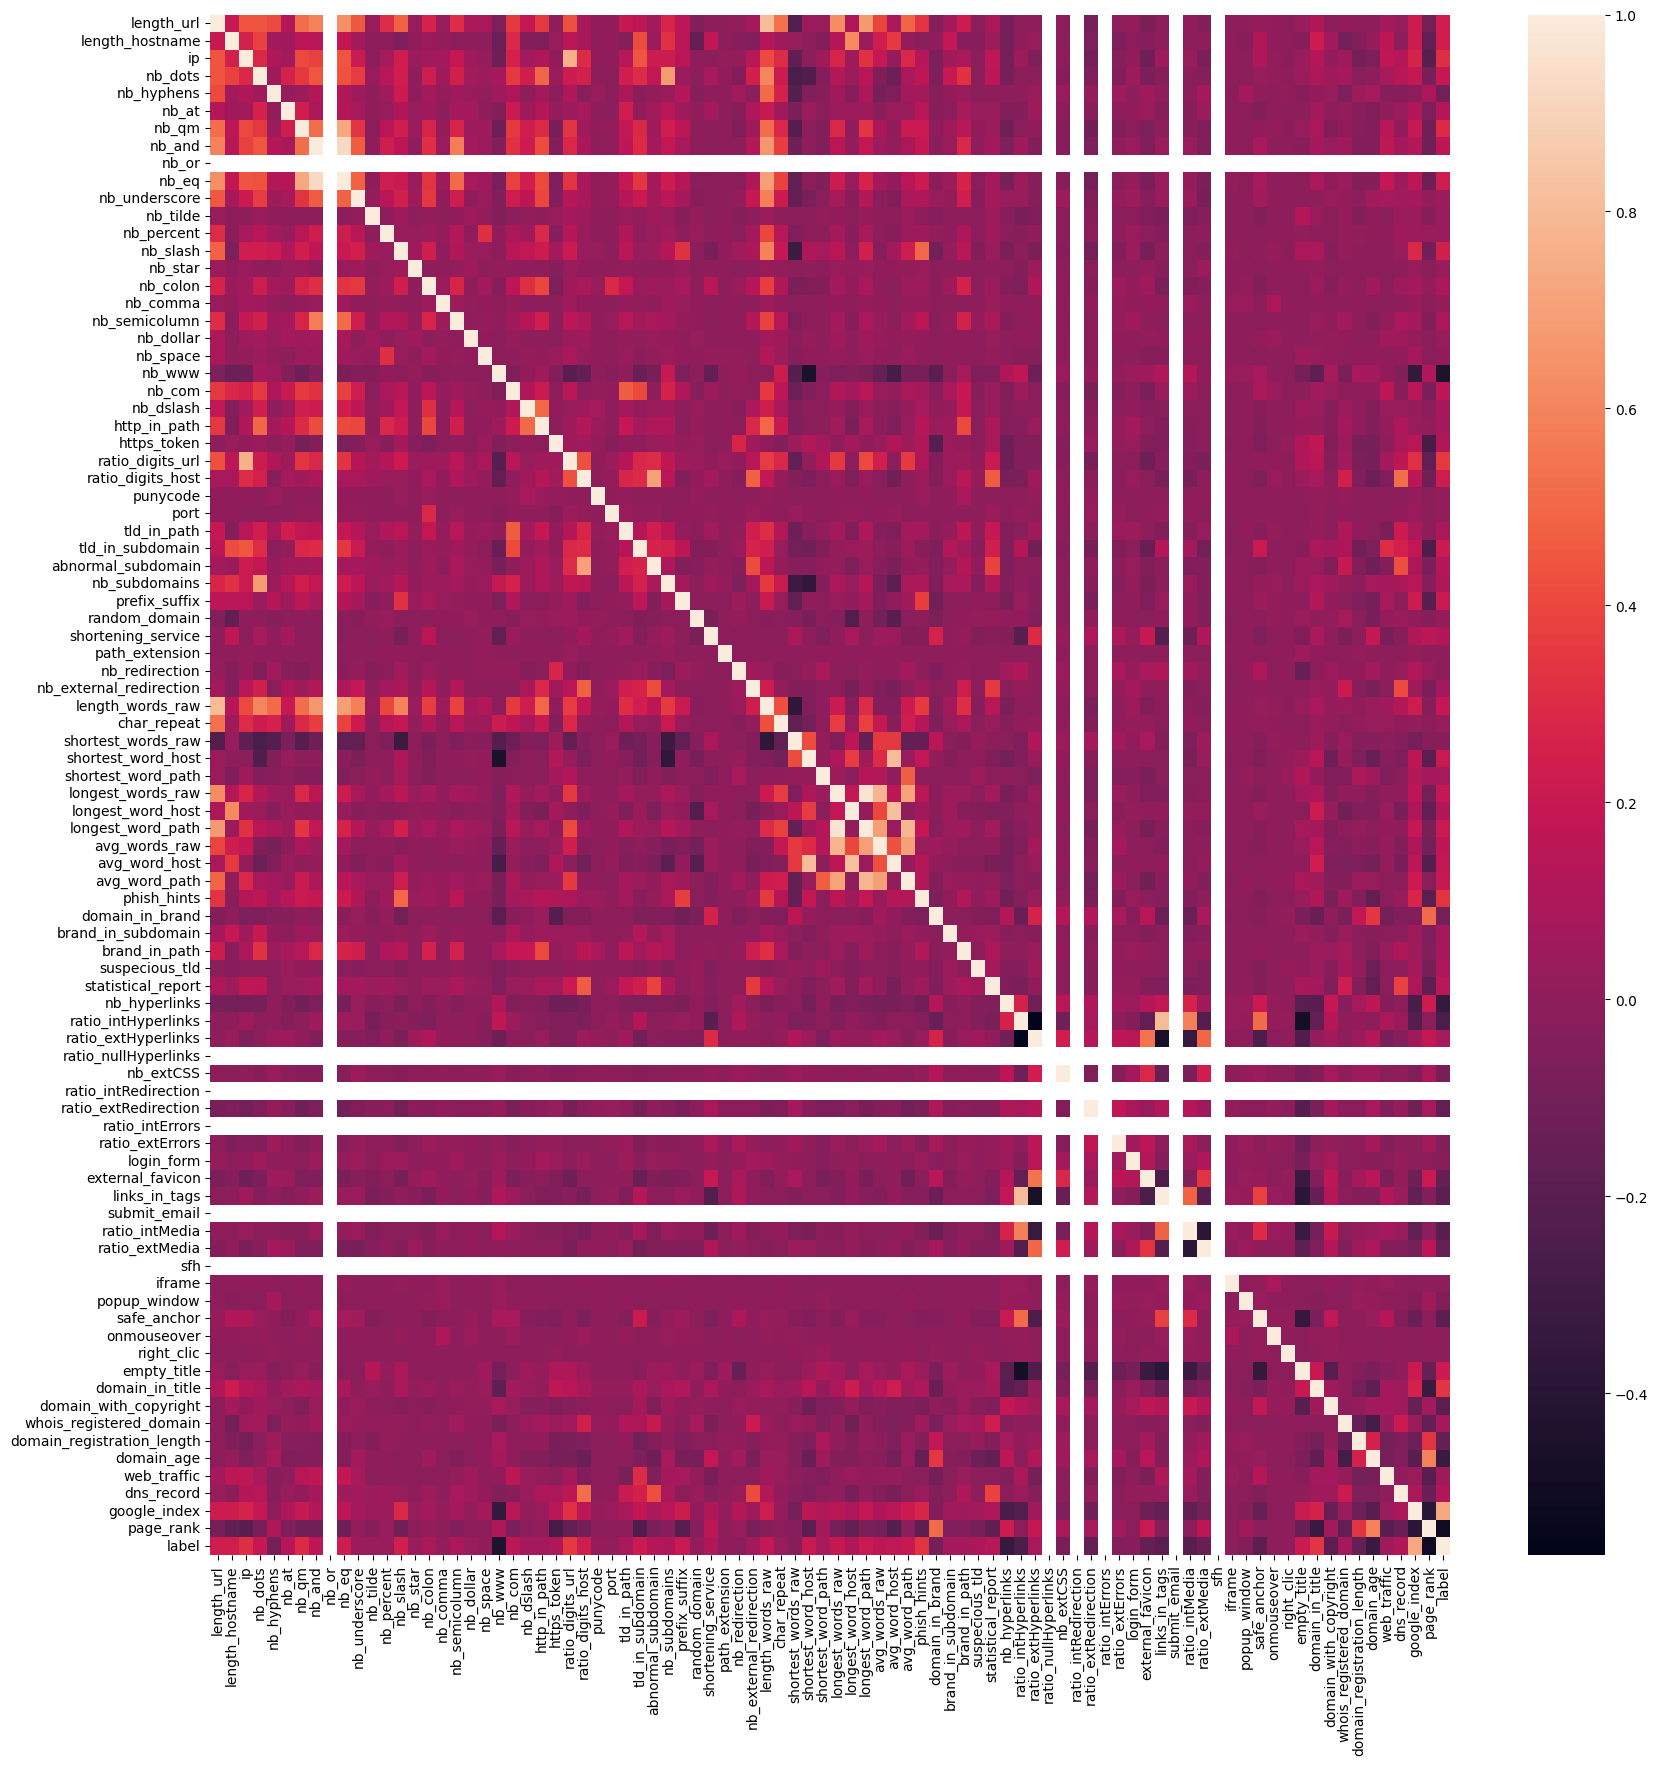

In [5]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(hugf.drop(columns = "url").corr())
plt.show()

In [6]:
#Pre processing data to get ready for Model training
hugf = hugf.drop(columns = ["url"])

X = hugf.drop("label", axis = 1)
y = hugf["label"]
X.shape,y.shape

((7658, 87), (7658,))

## Model Training

In [7]:
# Spliting data into a training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [8]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.944
Decision Tree: Accuracy on test Data: 0.930
